C:\Users\komko\AppData\Local\Temp\ipykernel_26652\3989317206.py:5: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\komko\Downloads\flights.csv\flights.csv")


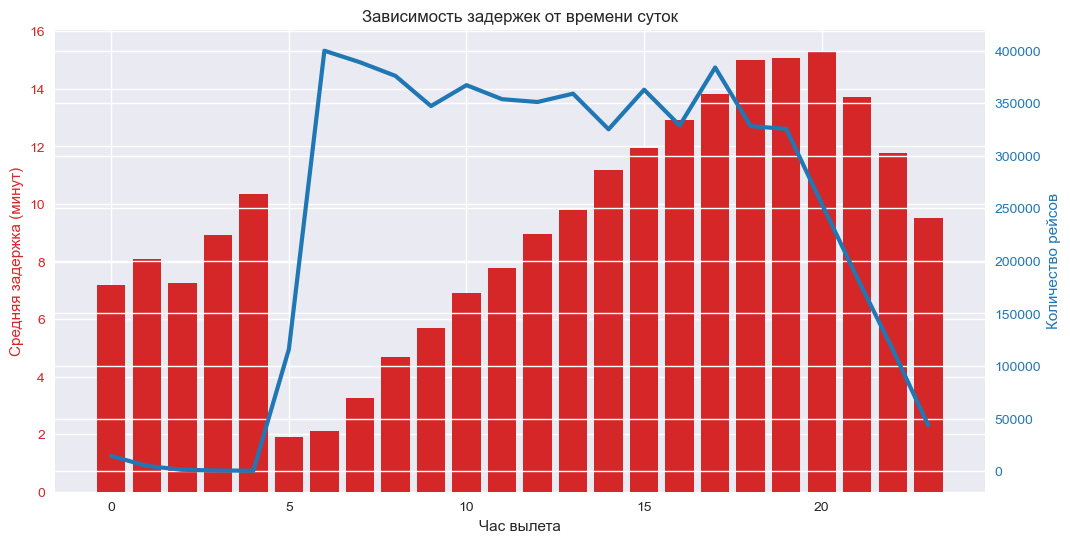

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r"C:\Users\komko\Downloads\flights.csv\flights.csv")
df['hour'] = df['SCHEDULED_DEPARTURE'] // 100
hourly_delay = df.groupby('hour')['DEPARTURE_DELAY'].agg(['mean', 'count']).reset_index()
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Час вылета')
ax1.set_ylabel('Средняя задержка (минут)', color='tab:red')
ax1.bar(hourly_delay['hour'], hourly_delay['mean'], color='tab:red', label='Средняя задержка')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Количество рейсов', color='tab:blue')
ax2.plot(hourly_delay['hour'], hourly_delay['count'], color='tab:blue', linewidth=3, label='Количество рейсов')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Зависимость задержек от времени суток')
plt.grid(True)
plt.show()

Вывод: 
Пиковые часы демонстрируют наибольшие задержки, что указывает на перегруженность аэропортов в эти периоды.

C:\Users\komko\AppData\Local\Temp\ipykernel_26652\3902525962.py:6: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\komko\Downloads\flights.csv\flights.csv")


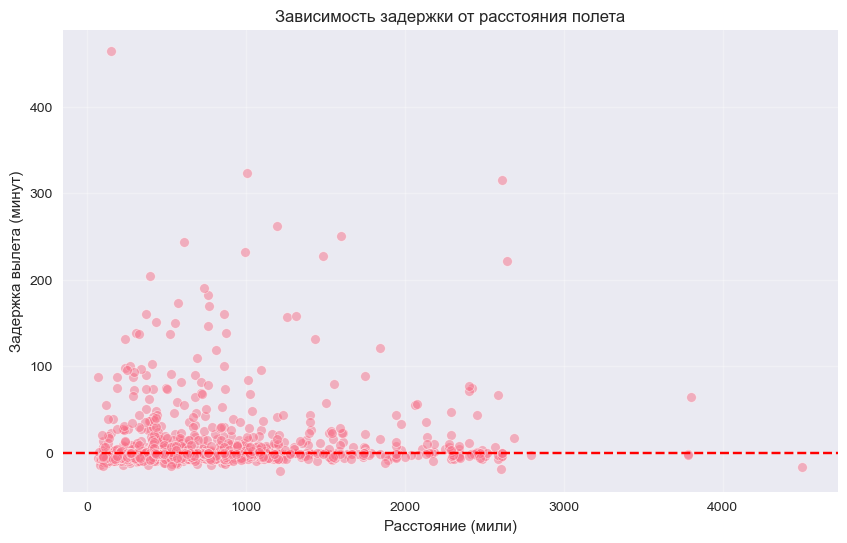

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r"C:\Users\komko\Downloads\flights.csv\flights.csv")
plt.figure(figsize=(10, 6))
sample_data = df.sample(min(1000, len(df)))  # Берем выборку
sns.scatterplot(data=sample_data, x='DISTANCE', y='DEPARTURE_DELAY', alpha=0.5)
plt.title('Зависимость задержки от расстояния полета')
plt.xlabel('Расстояние (мили)')
plt.ylabel('Задержка вылета (минут)')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(alpha=0.3)
plt.show()

Вывод:
Короткие рейсы имеют более широкий разброс задержек, тогда как длинные рейсы демонстрируют большую пунктуальность.

C:\Users\komko\AppData\Local\Temp\ipykernel_26652\737806118.py:5: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\komko\Downloads\flights.csv\flights.csv")


<Figure size 1200x600 with 0 Axes>

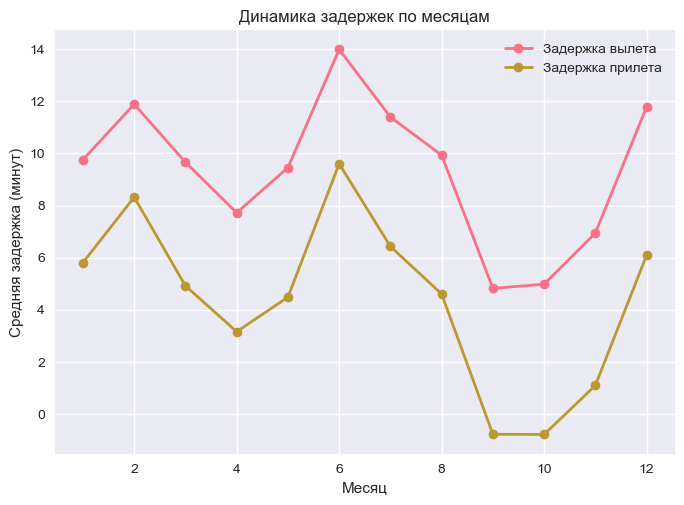

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r"C:\Users\komko\Downloads\flights.csv\flights.csv")

monthly_delay = df.groupby('MONTH').agg({
    'DEPARTURE_DELAY': 'mean',
    'ARRIVAL_DELAY': 'mean'
})

plt.figure(figsize=(12, 6))
monthly_delay.plot(kind='line', marker='o', linewidth=2)
plt.title('Динамика задержек по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя задержка (минут)')
plt.legend(['Задержка вылета', 'Задержка прилета'])
plt.grid(True)
plt.show()

Вывод: Летние месяцы и декабрь показывают пиковые значения задержек, что соответсвует периодам повышенной нагрузки.

C:\Users\komko\AppData\Local\Temp\ipykernel_26652\1720032513.py:6: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\komko\Downloads\flights.csv\flights.csv")


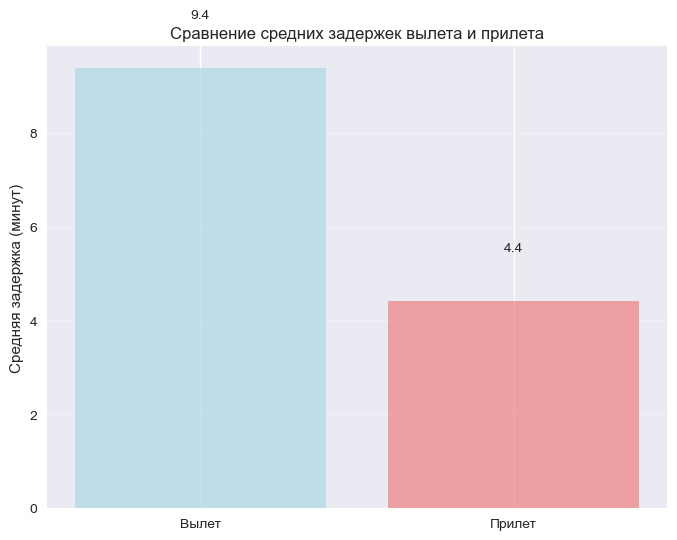

Задержки прилета в среднем на 5.0 минут меньше задержек вылета


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r"C:\Users\komko\Downloads\flights.csv\flights.csv")

departure_mean = df['DEPARTURE_DELAY'].mean()
arrival_mean = df['ARRIVAL_DELAY'].mean()

plt.figure(figsize=(8, 6))
plt.bar(['Вылет', 'Прилет'], [departure_mean, arrival_mean], 
        color=['lightblue', 'lightcoral'], alpha=0.7)
plt.title('Сравнение средних задержек вылета и прилета')
plt.ylabel('Средняя задержка (минут)')
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate([departure_mean, arrival_mean]):
    plt.text(i, v + 1, f'{v:.1f}', ha='center', va='bottom')

plt.show()

difference = arrival_mean - departure_mean
if difference > 0:
    print(f"Задержки прилета в среднем на {difference:.1f} минут больше задержек вылета")
else:
    print(f"Задержки прилета в среднем на {abs(difference):.1f} минут меньше задержек вылета")

Вывод:
Задержки прилета меньше задержек вылета, что говорит о усугублении проблем (задержки накладываются друг на друга). Если бы ситуация была противоположной, то была бы возможность наверстать упущенное время.

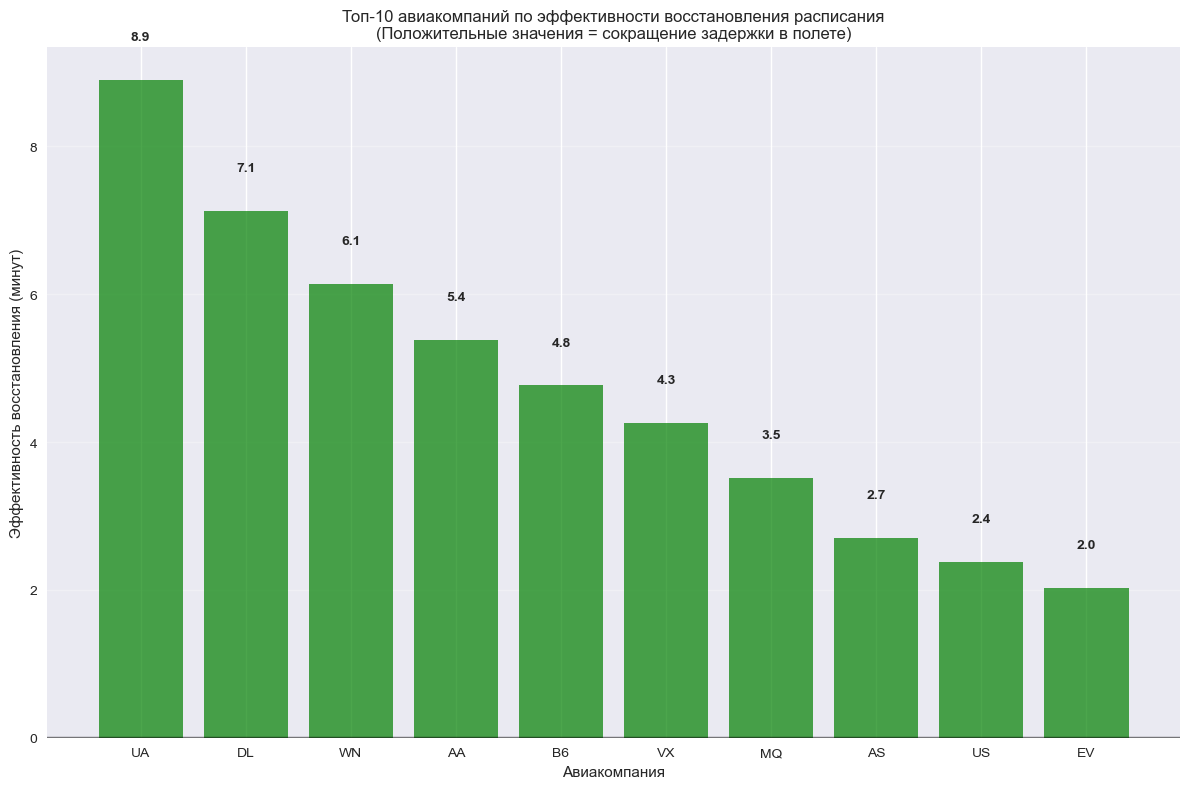

In [36]:
df['RECOVERY_EFFICIENCY'] = df['DEPARTURE_DELAY'] - df['ARRIVAL_DELAY']

recovery_by_airline = df.groupby('AIRLINE').agg({
    'RECOVERY_EFFICIENCY': 'mean',
    'DEPARTURE_DELAY': 'mean',
    'FLIGHT_NUMBER': 'count'
}).sort_values('RECOVERY_EFFICIENCY', ascending=False).head(10)

plt.figure(figsize=(12, 8))

positions = np.arange(len(recovery_by_airline))
plt.bar(positions, recovery_by_airline['RECOVERY_EFFICIENCY'], 
        color=['green' if x > 0 else 'red' for x in recovery_by_airline['RECOVERY_EFFICIENCY']],
        alpha=0.7)

plt.xlabel('Авиакомпания')
plt.ylabel('Эффективность восстановления (минут)')
plt.title('Топ-10 авиакомпаний по эффективности восстановления расписания\n(Положительные значения = сокращение задержки в полете)')
plt.xticks(positions, recovery_by_airline.index)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)

for i, v in enumerate(recovery_by_airline['RECOVERY_EFFICIENCY']):
    plt.text(i, v + (0.5 if v > 0 else -1.5), f'{v:.1f}', 
             ha='center', va='bottom' if v > 0 else 'top', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.show()

Вывод:
UA демонстрирует наилучшую эффективность восстановления расписания, сокращая задержки в среднем на 8.9 минут во время полета. Сокращение задержки сильно влияет на итоговое расписание вылетов. 